In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train=pd.read_csv('Google_Stock_Price_Train.csv')
df_test=pd.read_csv('Google_Stock_Price_Test.csv')

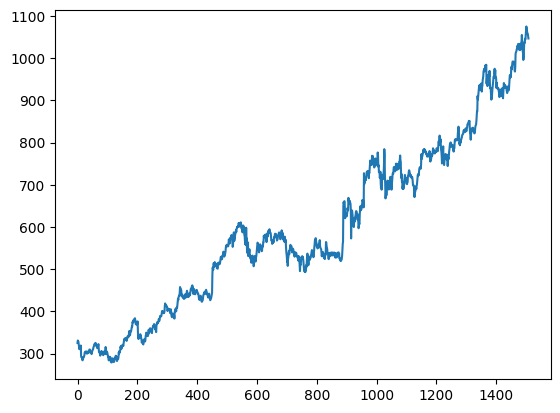

In [3]:
import matplotlib.pyplot as plt
plt.plot(df_train['Open'])

In [4]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


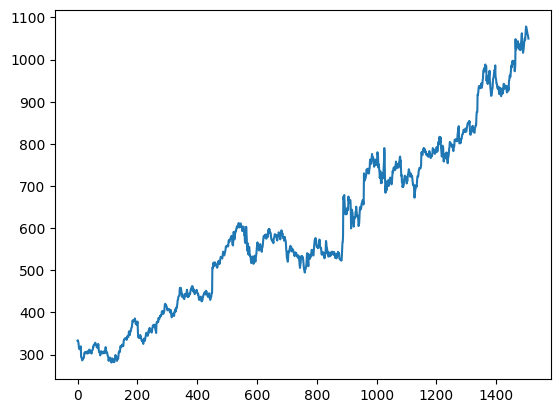

In [5]:
plt.plot(df_train['High'])

In [6]:
train_data=df_train.iloc[:, 1:2].values

In [7]:
scaler=MinMaxScaler(feature_range=(0, 1))
train_scaled=scaler.fit_transform(train_data)

In [8]:
X_train=[]
y_train=[]
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train=np.array(X_train), np.array(y_train)

In [9]:
X_train=np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))

In [10]:
model=Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(100, return_sequences=False),
    Dense(1)
])

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
23/23 [==============================] - 14s 234ms/step - loss: 0.0249 - accuracy: 0.0014
Epoch 2/10
23/23 [==============================] - 5s 201ms/step - loss: 0.0015 - accuracy: 0.0014
Epoch 3/10
23/23 [==============================] - 4s 193ms/step - loss: 6.1305e-04 - accuracy: 0.0014
Epoch 4/10
23/23 [==============================] - 5s 228ms/step - loss: 5.3594e-04 - accuracy: 0.0014
Epoch 5/10
23/23 [==============================] - 5s 212ms/step - loss: 5.1103e-04 - accuracy: 0.0014
Epoch 6/10
23/23 [==============================] - 5s 220ms/step - loss: 5.0928e-04 - accuracy: 0.0014
Epoch 7/10
23/23 [==============================] - 7s 294ms/step - loss: 4.9523e-04 - accuracy: 0.0014
Epoch 8/10
23/23 [==============================] - 7s 292ms/step - loss: 4.8657e-04 - accuracy: 0.0014
Epoch 9/10
23/23 [==============================] - 5s 218ms/step - loss: 5.0157e-04 - accuracy: 0.0014
Epoch 10/10
23/23 [==============================] - 5s 226ms/step - lo

In [12]:
test_ini=df_test.iloc[:, 1:2].values

In [13]:
dataset_total=pd.concat((df_train['Open'], df_test['Open']), axis=0)
test_data=dataset_total[len(dataset_total)-len(df_test)-60:].values

C:\Users\suraj\AppData\Local\Temp\ipykernel_16160\3437834689.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_data=dataset_total[len(dataset_total)-len(df_test)-60:].values


In [14]:
test_data=test_data.reshape(-1, 1)
test_data=scaler.transform(test_data)

In [15]:
X_test=[]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))

In [16]:
predictions=model.predict(X_test)

4/4 [==============================] - 3s 96ms/step


In [17]:
final_pred=scaler.inverse_transform(predictions)

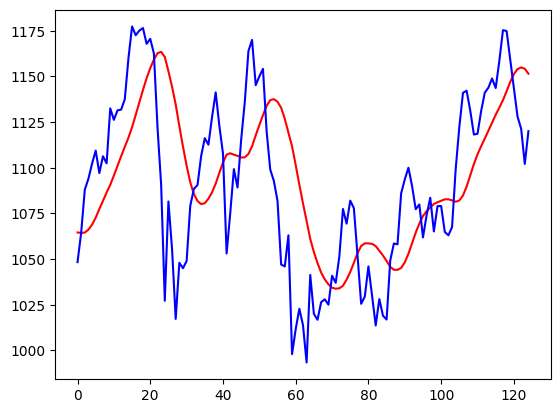

In [18]:
plt.plot(final_pred, color='red')
plt.plot(test_ini, color='blue')

In [19]:
y_test=[]
for i in range(60, len(test_data)):
    y_test.append(test_data[i,0])
y_test=np.array(y_test)

In [20]:
loss, acc=model.evaluate(X_test, y_test)
loss, acc

4/4 [==============================] - 3s 76ms/step - loss: 0.0027 - accuracy: 0.0000e+00


(0.0026779319159686565, 0.0)

In [21]:
from sklearn.metrics import mean_squared_error, accuracy_score
print(np.sqrt(mean_squared_error(y_test, predictions)))

0.05174873210370096
